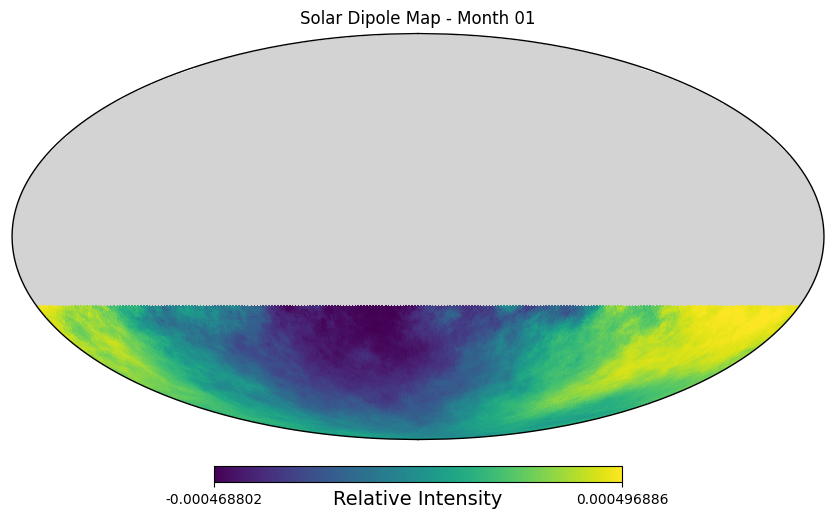

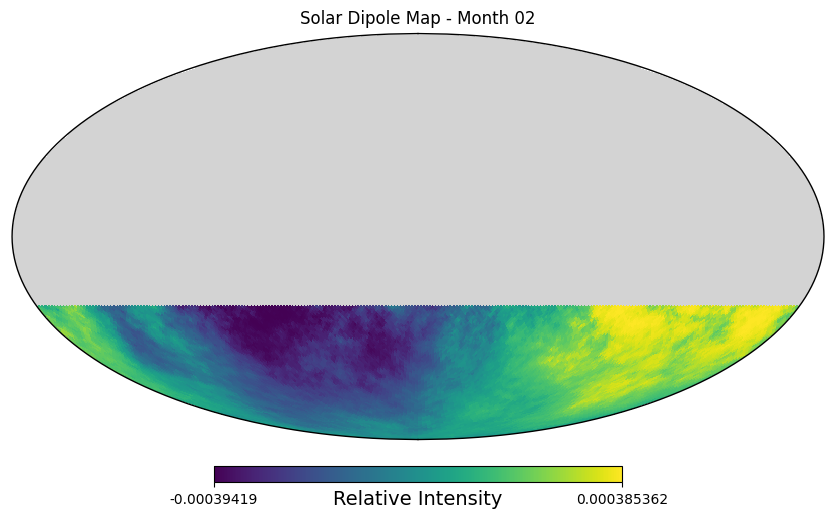

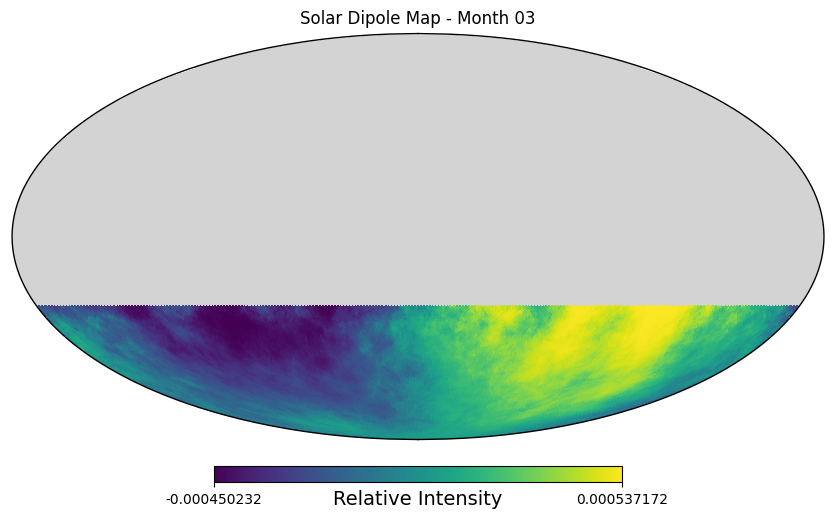

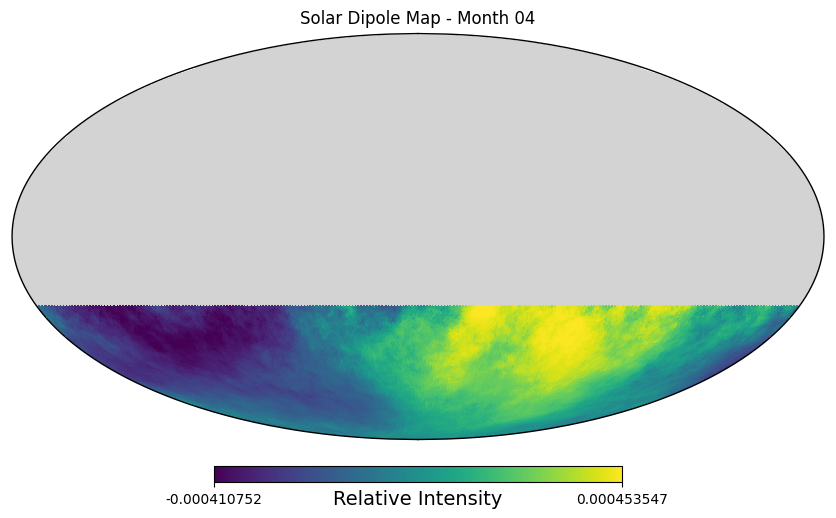

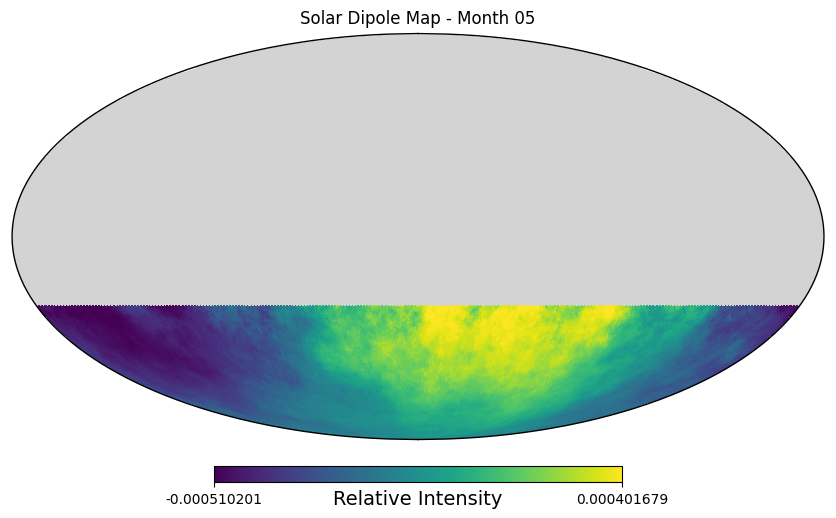

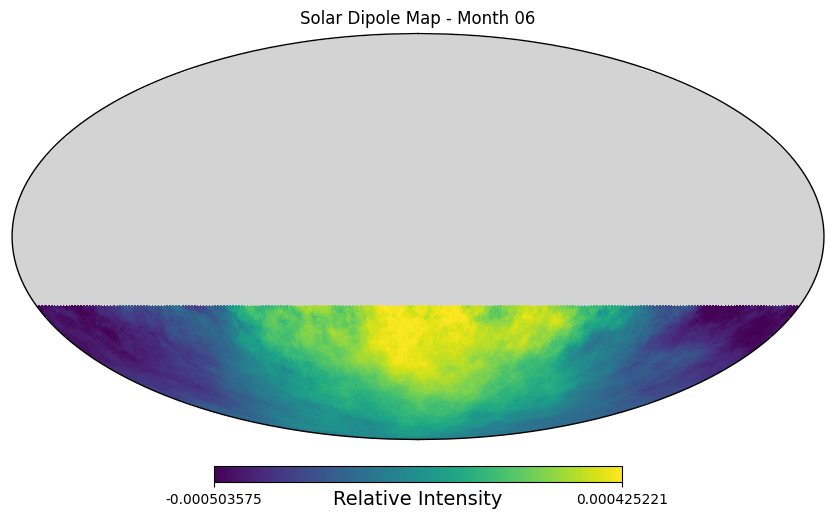

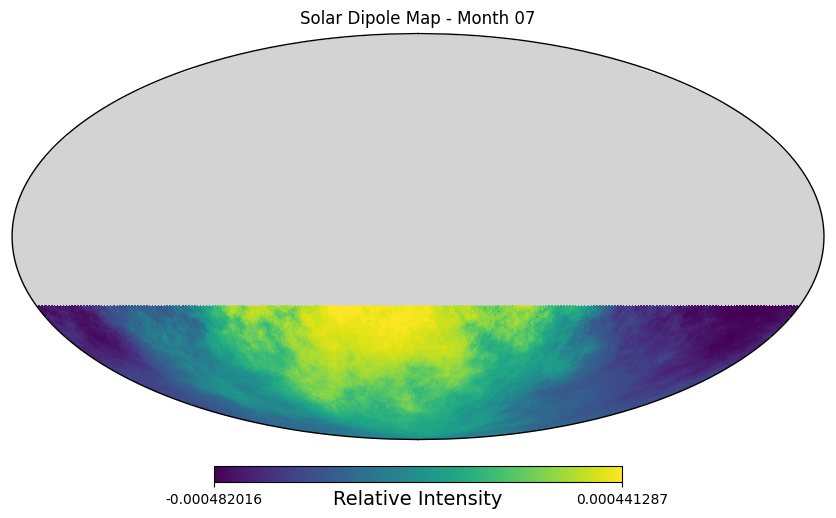

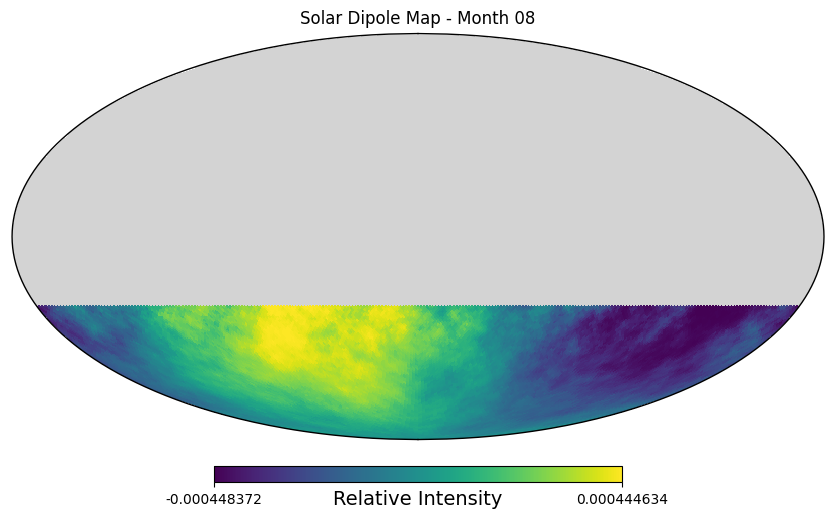

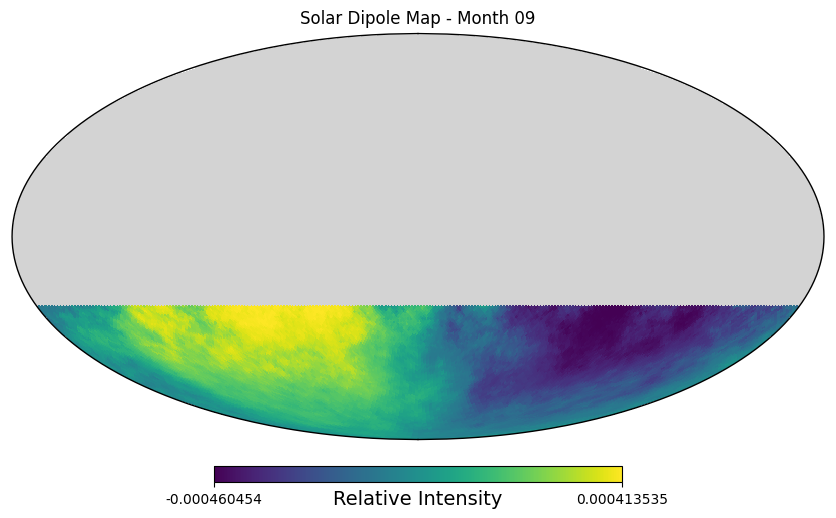

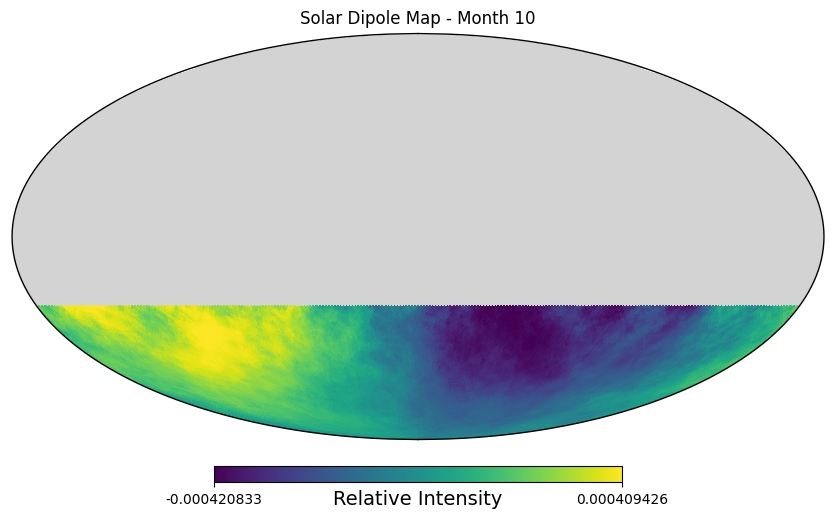

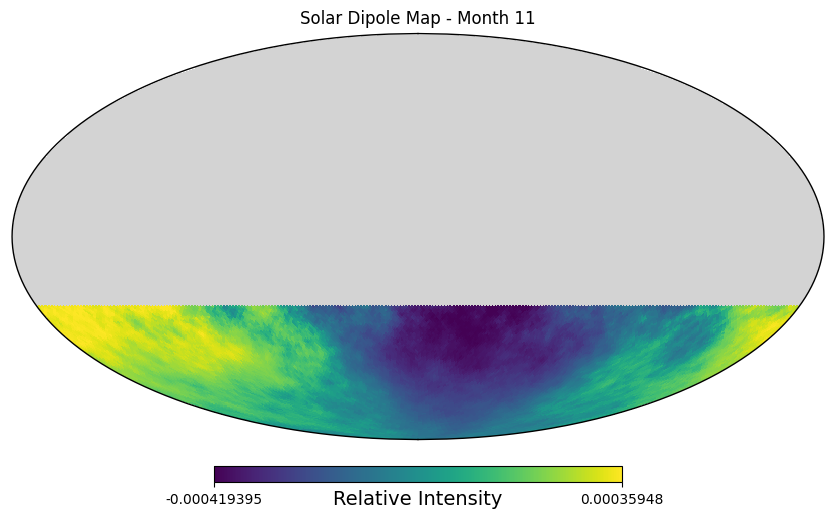

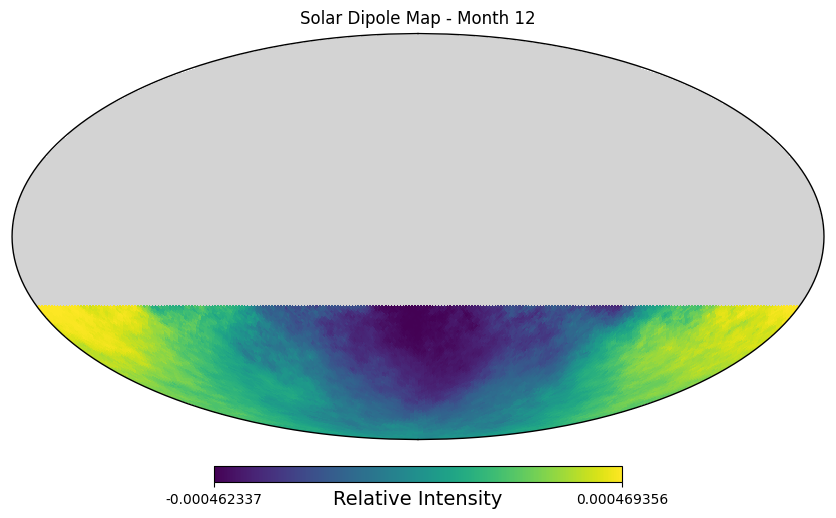

In [11]:
import matplotlib.pyplot as plt
import healpy as hp
import numpy as np
import os
from mapFunctions import getMap

# Paths
monthly_dir = '/data/user/fmcnally/anisotropy/maps/merged_monthly/'
monthly_file_fmt = 'IC86_N10_sid_{:02d}_old.fits'
all_map_file = '/data/user/fmcnally/anisotropy/maps/merged/IC86_N10_sid.fits'

#Output directory
output_dir = './solar_dipole_maps'
os.makedirs(output_dir, exist_ok=True)

# Load 12-year full data map
if not os.path.isfile(all_map_file):
    raise FileNotFoundError(f"All-data map not found: {all_map_file}")
all_relint = getMap([all_map_file], mapName='relint', smooth=10, verbose=False, mask=True)

# Loop through each month
for month in range(1, 13):
    month_file = os.path.join(monthly_dir, monthly_file_fmt.format(month))

    if not os.path.isfile(month_file):
        print(f"[Month {month:02d}] Skipping: file not found ({month_file})")
        continue

    try:
        month_relint = getMap([month_file], mapName='relint', smooth=10, verbose=False, mask=True)
    except Exception as e:
        print(f"[Month {month:02d}] Error loading map: {e}")
        continue

    if month_relint is None or all_relint is None:
        print(f"[Month {month:02d}] Skipping: relint map not available.")
        continue

    # Compute difference map (solar dipole)
    diff_map = month_relint - all_relint

    # Mask northern hemisphere and invalid pixels
    nside = hp.get_nside(diff_map)
    npix = hp.nside2npix(nside)
    theta, _ = hp.pix2ang(nside, np.arange(npix))

    diff_map_masked = diff_map.copy()
    north_mask = theta < (np.pi / 2)
    invalid_mask = (~np.isfinite(diff_map)) | (diff_map == 0) | (diff_map == hp.UNSEEN)
    total_mask = north_mask | invalid_mask
    diff_map_masked[total_mask] = hp.UNSEEN

    # Plot and save/display map
    title = f'Solar Dipole Map - Month {month:02d}'
    output_png = os.path.join(output_dir, f'SolarDipoleMap_Month_{month:02d}.png')

    hp.mollview(
        diff_map_masked,
        title=title,
        unit='Relative Intensity',
        norm='hist',
        notext=True,
        badcolor='lightgrey'
    )
    hp.graticule(visible=False)
    plt.axis('off')
    plt.savefig(output_png, dpi=200, bbox_inches='tight')
    plt.show()
    plt.close()


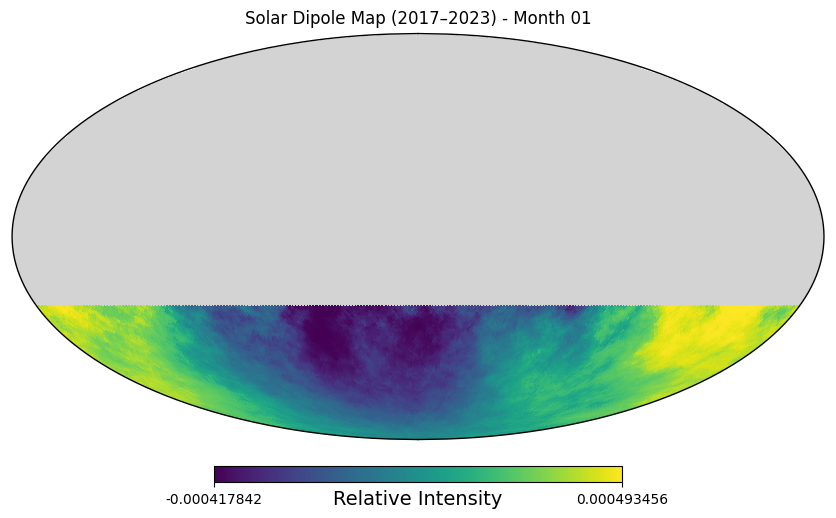

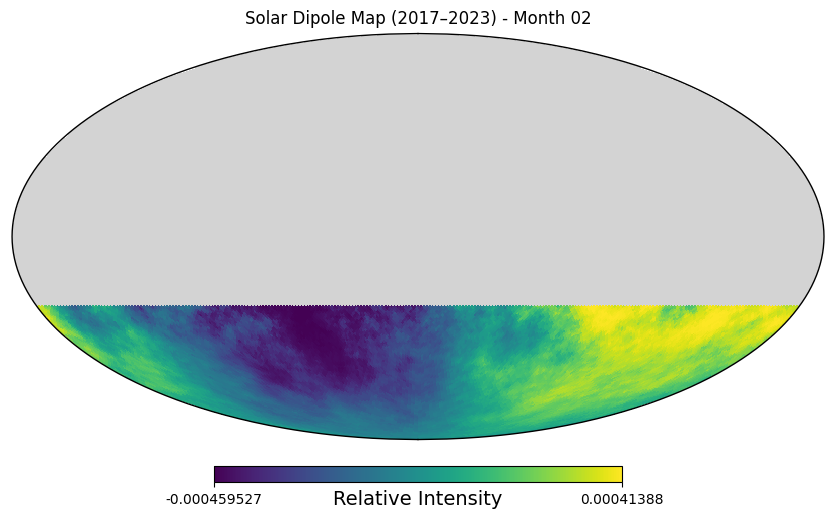

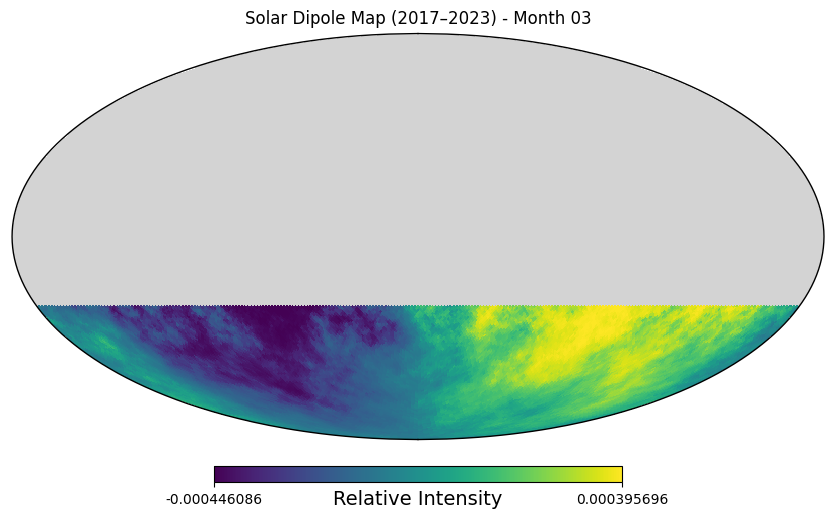

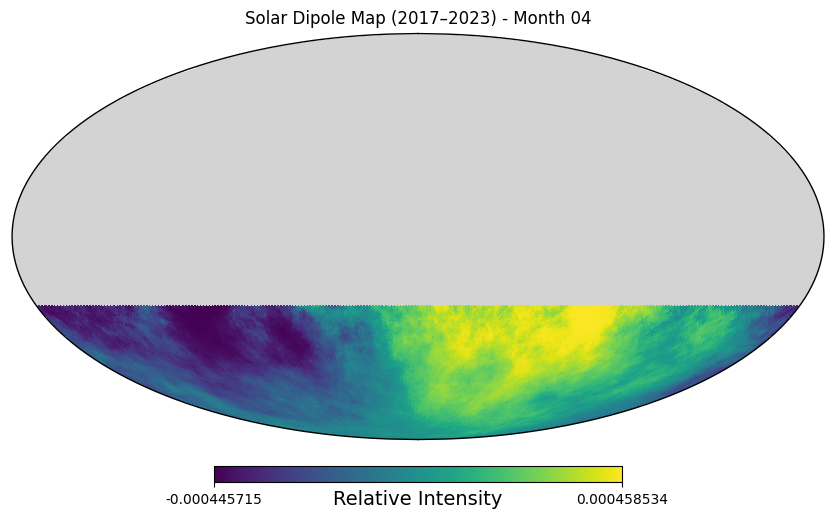

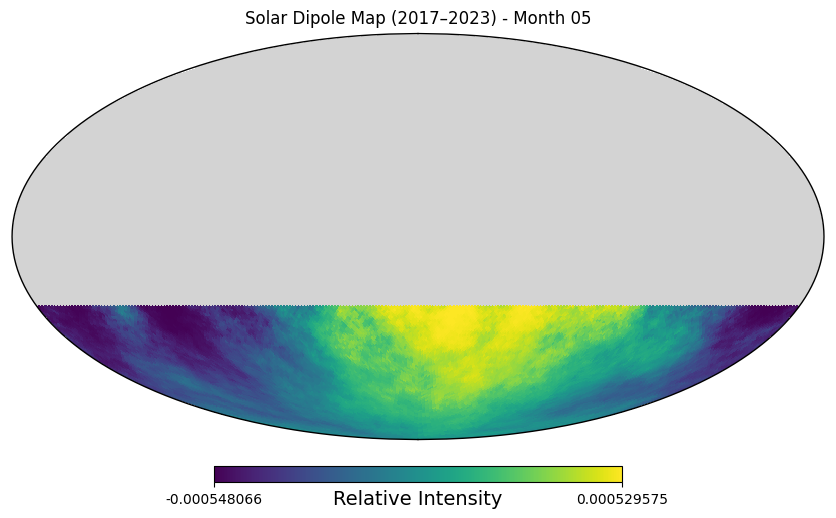

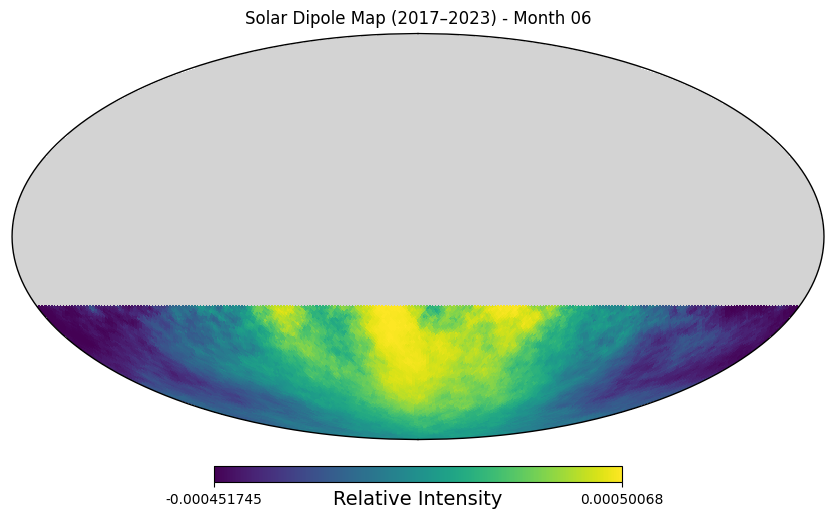

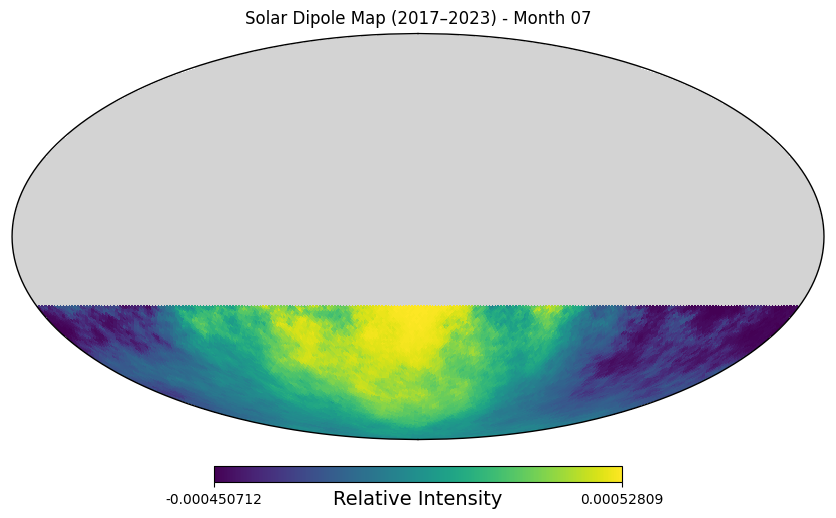

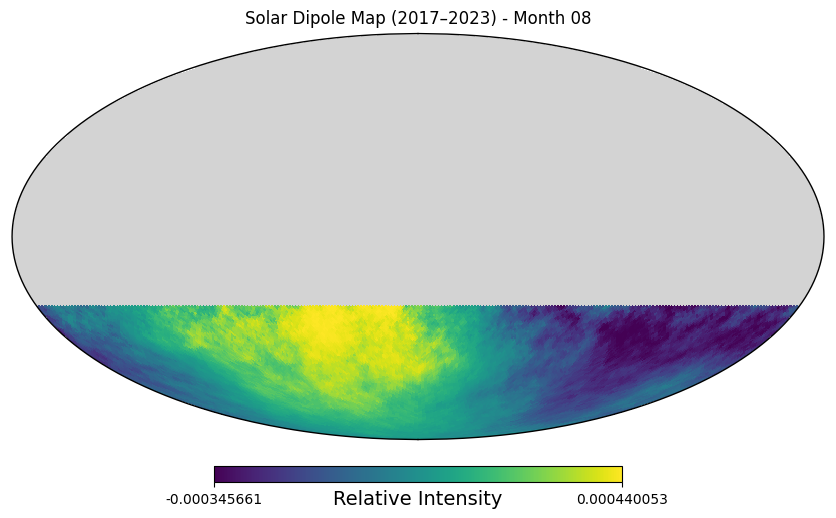

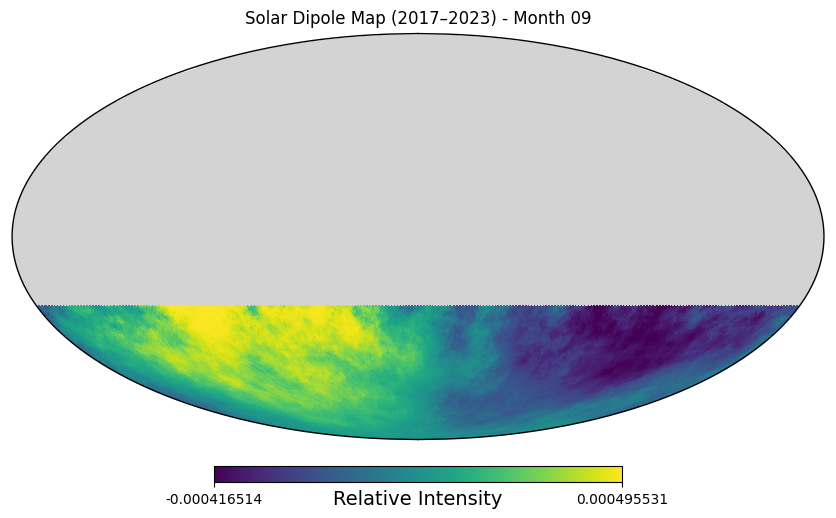

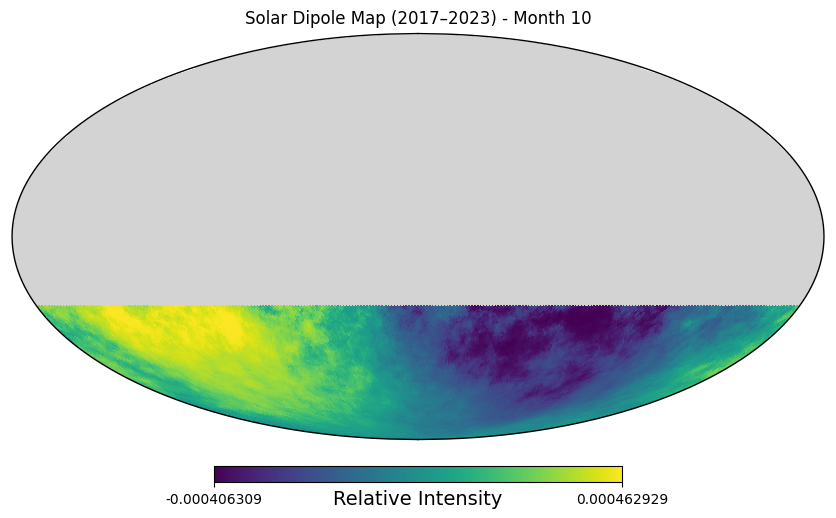

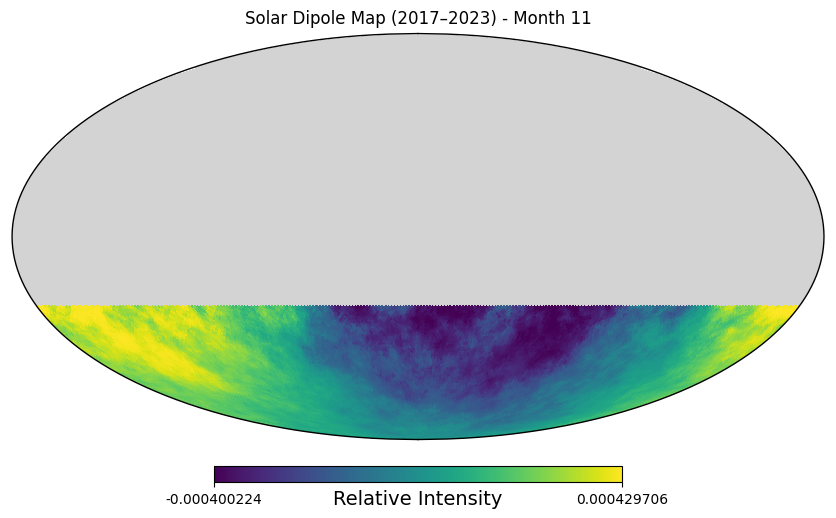

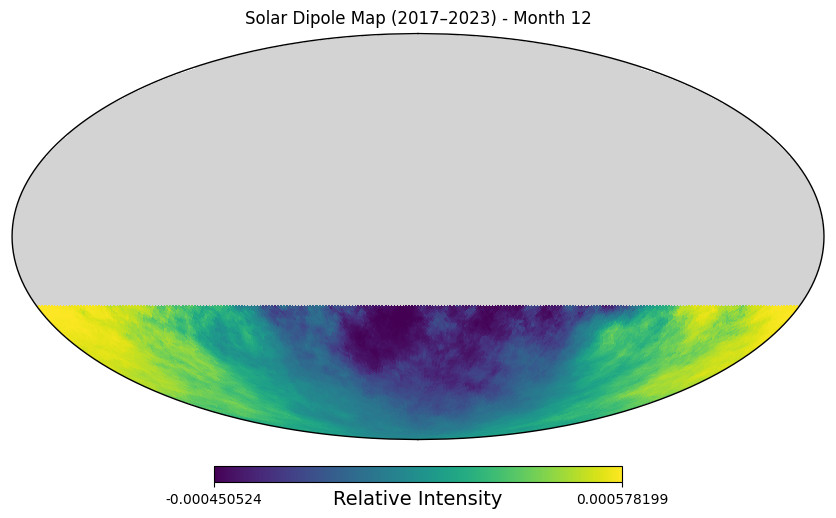

In [14]:
import matplotlib.pyplot as plt
import healpy as hp
import numpy as np
import os
from mapFunctions import getMap

# Paths
monthly_dir = '/data/user/fmcnally/anisotropy/maps/merged_monthly/'
monthly_file_fmt = 'IC86_N10_sid_{:02d}_new.fits'  # 2017–2023 format
all_map_file = '/data/user/fmcnally/anisotropy/maps/merged/IC86_N10_sid.fits'

# Output directory
output_dir = './solar_dipole_maps_2017_2023'
os.makedirs(output_dir, exist_ok=True)

# Load 12-year full data map
if not os.path.isfile(all_map_file):
    raise FileNotFoundError(f"All-data map not found: {all_map_file}")
all_relint = getMap([all_map_file], mapName='relint', smooth=10, verbose=False, mask=True)

# Loop through each month
for month in range(1, 13):
    month_file = os.path.join(monthly_dir, monthly_file_fmt.format(month))

    if not os.path.isfile(month_file):
        print(f"[Month {month:02d}] Skipping: file not found ({month_file})")
        continue

    try:
        month_relint = getMap([month_file], mapName='relint', smooth=10, verbose=False, mask=True)
    except Exception as e:
        print(f"[Month {month:02d}] Error loading map: {e}")
        continue

    if month_relint is None or all_relint is None:
        print(f"[Month {month:02d}] Skipping: relint map not available.")
        continue

    # Compute difference map (solar dipole)
    diff_map = month_relint - all_relint

    # Mask northern hemisphere and invalid pixels
    nside = hp.get_nside(diff_map)
    npix = hp.nside2npix(nside)
    theta, _ = hp.pix2ang(nside, np.arange(npix))

    diff_map_masked = diff_map.copy()
    north_mask = theta < (np.pi / 2)
    invalid_mask = (~np.isfinite(diff_map)) | (diff_map == 0) | (diff_map == hp.UNSEEN)
    total_mask = north_mask | invalid_mask
    diff_map_masked[total_mask] = hp.UNSEEN

    # Plot and save/display map
    title = f'Solar Dipole Map (2017–2023) - Month {month:02d}'
    output_png = os.path.join(output_dir, f'SolarDipoleMap_Month_{month:02d}_new.png')

    hp.mollview(
        diff_map_masked,
        title=title,
        unit='Relative Intensity',
        norm='hist',
        notext=True,
        badcolor='lightgrey'
    )
    hp.graticule(visible=False)
    plt.axis('off')
    plt.savefig(output_png, dpi=200, bbox_inches='tight')
    plt.show()
    plt.close()


[2011–2017 - Month 01] A = 4.2653e-04 ± 8.2e-06, RA = 241.26°
[2011–2017 - Month 02] A = 3.7646e-04 ± 1.0e-05, RA = 215.21°
[2011–2017 - Month 03] A = 3.7667e-04 ± 1.2e-05, RA = 180.04°
[2011–2017 - Month 04] A = 4.0945e-04 ± 9.1e-06, RA = 153.87°
[2011–2017 - Month 05] A = 4.2954e-04 ± 1.1e-05, RA = 126.54°
[2011–2017 - Month 06] A = 4.7395e-04 ± 8.8e-06, RA = 94.57°
[2011–2017 - Month 07] A = 4.2907e-04 ± 1.2e-05, RA = 69.42°
[2011–2017 - Month 08] A = 4.1357e-04 ± 6.6e-06, RA = 38.33°
[2011–2017 - Month 09] A = 4.1512e-04 ± 8.2e-06, RA = 9.01°
[2011–2017 - Month 10] A = 4.1517e-04 ± 9.1e-06, RA = 334.41°
[2011–2017 - Month 11] A = 3.6922e-04 ± 1.6e-05, RA = 303.37°
[2011–2017 - Month 12] A = 4.1904e-04 ± 9.8e-06, RA = 274.38°
[2017–2023 - Month 01] A = 4.1403e-04 ± 1.3e-05, RA = 249.92°
[2017–2023 - Month 02] A = 3.9417e-04 ± 8.3e-06, RA = 215.58°
[2017–2023 - Month 03] A = 3.7353e-04 ± 1.1e-05, RA = 187.49°
[2017–2023 - Month 04] A = 3.8254e-04 ± 1.5e-05, RA = 152.80°
[2017–2023 - 

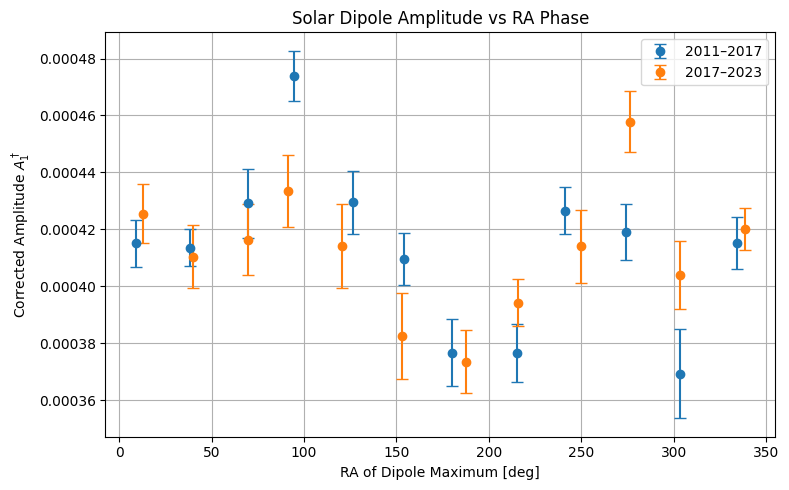

In [1]:
import matplotlib.pyplot as plt
import healpy as hp
import numpy as np
import pandas as pd
import os
from scipy.optimize import curve_fit
from mapFunctions import getMap

# --- Dipole model for 1D cosine fit ---
def acos_func(x, A, phi):
    return A * np.cos(np.radians(x) + phi)

# --- 1D RA projection ---
def returnRI(relint_map, relerr_map, **opts):
    degree = np.pi / 180
    ramin = opts['ramin'] * degree
    ramax = opts['ramax'] * degree
    rabins = np.linspace(ramin, ramax, opts['nbins'] + 1)

    npix = len(relint_map)
    nside = hp.npix2nside(npix)
    theta, phi = hp.pix2ang(nside, range(npix))

    phiBins = np.digitize(phi, rabins) - 1
    cut = (relint_map != hp.UNSEEN)

    ri, sigmay = np.zeros((2, opts['nbins']))
    for i in range(opts['nbins']):
        phiCut = (phiBins == i)
        c0 = cut * phiCut
        ri[i] = np.mean(relint_map[c0])
        sigmay[i] = np.sqrt(np.sum(relerr_map[c0] ** 2)) / c0.sum()

    dx = (ramax - ramin) / (2 * opts['nbins'])
    ra = np.linspace(ramin + dx, ramax - dx, opts['nbins']) / degree
    sigmax = dx * np.ones(opts['nbins']) / degree

    return (ra, ri, sigmax, sigmay)

# --- Declination correction factor (IceCube FoV) ---
delta_min = np.radians(-90)
delta_max = np.radians(-30)
numerator = 2 * (np.sin(delta_min) - np.sin(delta_max))
denominator = (
    delta_min - delta_max +
    np.cos(delta_min) * np.sin(delta_min) -
    np.cos(delta_max) * np.sin(delta_max)
)
correction_factor = numerator / denominator

# --- Axial tilt correction for RA phase ---
epsilon = np.radians(23.44)
rot_x = np.array([
    [1, 0, 0],
    [0, np.cos(epsilon), -np.sin(epsilon)],
    [0, np.sin(epsilon),  np.cos(epsilon)]
])
dipole_equatorial = rot_x @ np.array([0, 0, 1])
x_eq, y_eq, _ = dipole_equatorial
tilt_ra_offset = np.degrees(np.arctan2(y_eq, x_eq)) % 360
tilt_ra_shift = (tilt_ra_offset - 180)  # ~0 but included for completeness

# --- Load all-year map ---
all_map_file = '/data/user/fmcnally/anisotropy/maps/merged/IC86_N10_sid.fits'
all_data, all_bg, _ = hp.read_map(all_map_file, field=(0, 1, 2))
all_relint = getMap([all_map_file], mapName='relint', smooth=10, verbose=False, mask=True)

# --- Analysis wrapper ---
def analyze_half(label, monthly_base_fmt):
    results = []
    for month in range(1, 13):
        month_file = monthly_base_fmt.format(month)
        if not os.path.isfile(month_file):
            print(f"[{label}] Skipping month {month:02d}: file not found")
            continue

        try:
            month_data, month_bg, _ = hp.read_map(month_file, field=(0, 1, 2))
            month_relint = getMap([month_file], mapName='relint', smooth=10, verbose=False, mask=True)
        except Exception as e:
            print(f"[{label}] Error loading month {month:02d}: {e}")
            continue

        if month_relint is None or all_relint is None:
            continue

        # Difference map
        diff_map = month_relint - all_relint
        nside = hp.get_nside(diff_map)
        theta, _ = hp.pix2ang(nside, np.arange(hp.nside2npix(nside)))

        # Masking
        diff_map_masked = diff_map.copy()
        full_mask = (theta < np.pi / 2) | (~np.isfinite(diff_map)) | (diff_map == 0) | (diff_map == hp.UNSEEN)
        diff_map_masked[full_mask] = hp.UNSEEN

        # Errors
        sigma_month = np.sqrt((month_data / month_bg)**2 * (1.0 / month_data + 1.0 / (month_bg * 20)))
        sigma_all = np.sqrt((all_data / all_bg)**2 * (1.0 / all_data + 1.0 / (all_bg * 20)))
        sigma_total = np.sqrt(sigma_month**2 + sigma_all**2)
        sigma_total[full_mask] = hp.UNSEEN

        # RA projection
        ra, ri, _, sigmay = returnRI(diff_map_masked, sigma_total, ramin=0, ramax=360, nbins=24)

        try:
            popt, pcov = curve_fit(acos_func, ra, ri, sigma=sigmay, bounds=([0, 0], [0.01, 2 * np.pi]))
            A_raw, phi_raw = popt
            A_err, phi_err = np.sqrt(np.diag(pcov))

            A_corr = correction_factor * A_raw
            A_err_corr = correction_factor * A_err
            RA_phase = np.degrees(phi_raw) % 360
            RA_phase_corrected = (RA_phase + tilt_ra_shift) % 360

            results.append({
                'Half': label,
                'Month': month,
                'Amplitude': A_corr,
                'Amplitude_Error': A_err_corr,
                'RA_Phase': RA_phase_corrected
            })

            print(f"[{label} - Month {month:02d}] A = {A_corr:.4e} ± {A_err_corr:.1e}, RA = {RA_phase_corrected:.2f}°")

        except Exception as e:
            print(f"[{label} - Month {month:02d}] Fit failed: {e}")

    return results

# --- Run analysis for both halves ---
results_old = analyze_half("2011–2017", "/data/user/fmcnally/anisotropy/maps/merged_monthly/IC86_N10_sid_{:02d}_old.fits")
results_new = analyze_half("2017–2023", "/data/user/fmcnally/anisotropy/maps/merged_monthly/IC86_N10_sid_{:02d}_new.fits")

# --- Combine and Save ---
combined_df = pd.DataFrame(results_old + results_new)
combined_df.to_csv("solar_dipole_all_years.csv", index=False)

# --- Plot ---
plt.figure(figsize=(8, 5))
for label, group in combined_df.groupby('Half'):
    plt.errorbar(
        group['RA_Phase'], group['Amplitude'], yerr=group['Amplitude_Error'],
        fmt='o', label=label, capsize=4
    )
plt.xlabel('RA of Dipole Maximum [deg]')
plt.ylabel('Corrected Amplitude $A_1^\\dagger$')
plt.title('Solar Dipole Amplitude vs RA Phase')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("dipole_amp_vs_RA_both_halves.png")
plt.show()


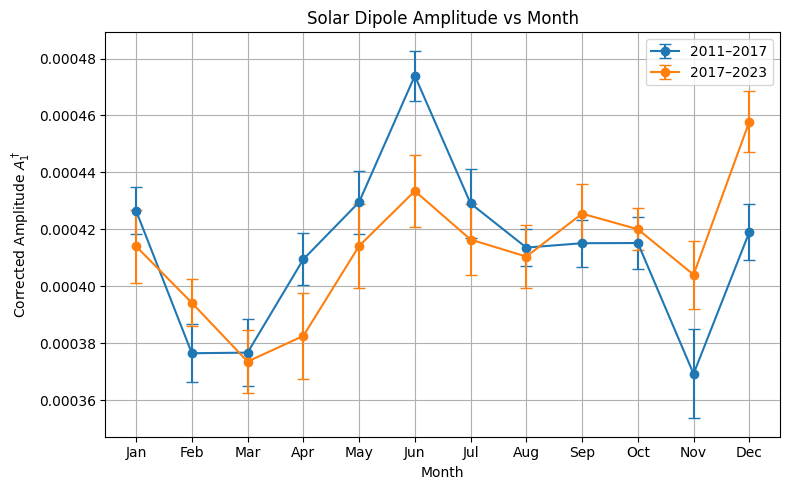

In [28]:
# --- Plot Amplitude vs Month ---
plt.figure(figsize=(8, 5))
for label, group in combined_df.groupby('Half'):
    plt.errorbar(
        group['Month'], group['Amplitude'], yerr=group['Amplitude_Error'],
        fmt='o-', label=label, capsize=4
    )

plt.xticks(ticks=np.arange(1, 13), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])
plt.xlabel('Month')
plt.ylabel('Corrected Amplitude $A_1^\\dagger$')
plt.title('Solar Dipole Amplitude vs Month')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("dipole_amp_vs_month_both_halves.png")
plt.show()


In [22]:
import numpy as np

# Earth orbital speed divided by speed of light
v_over_c = 9.94021e-5

# Data: list of (month label, amplitude, amplitude_error)
data = [
    ("2011-2017 Month 01", 4.2653e-4, 8.2e-6),
    ("2011-2017 Month 02", 3.7646e-4, 1.0e-5),
    ("2011-2017 Month 03", 3.7667e-4, 1.2e-5),
    ("2011-2017 Month 04", 4.0945e-4, 9.1e-6),
    ("2011-2017 Month 05", 4.2954e-4, 1.1e-5),
    ("2011-2017 Month 06", 4.7395e-4, 8.8e-6),
    ("2011-2017 Month 07", 4.2907e-4, 1.2e-5),
    ("2011-2017 Month 08", 4.1357e-4, 6.6e-6),
    ("2011-2017 Month 09", 4.1512e-4, 8.2e-6),
    ("2011-2017 Month 10", 4.1517e-4, 9.1e-6),
    ("2011-2017 Month 11", 3.6922e-4, 1.6e-5),
    ("2011-2017 Month 12", 4.1904e-4, 9.8e-6),
    ("2017-2023 Month 01", 4.1403e-4, 1.3e-5),
    ("2017-2023 Month 02", 3.9417e-4, 8.3e-6),
    ("2017-2023 Month 03", 3.7353e-4, 1.1e-5),
    ("2017-2023 Month 04", 3.8254e-4, 1.5e-5),
    ("2017-2023 Month 05", 4.1413e-4, 1.5e-5),
    ("2017-2023 Month 06", 4.3345e-4, 1.3e-5),
    ("2017-2023 Month 07", 4.1640e-4, 1.2e-5),
    ("2017-2023 Month 08", 4.1041e-4, 1.1e-5),
    ("2017-2023 Month 09", 4.2550e-4, 1.0e-5),
    ("2017-2023 Month 10", 4.2002e-4, 7.3e-6),
    ("2017-2023 Month 11", 4.0405e-4, 1.2e-5),
    ("2017-2023 Month 12", 4.5785e-4, 1.1e-5),
]

print(f"{'Month':20s} {'Gamma':>8s} {'Error':>10s}")
for label, amp, amp_err in data:
    gamma = amp / v_over_c - 2
    gamma_err = amp_err / v_over_c
    print(f"{label:20s} {gamma:8.3f} {gamma_err:10.3f}")

Month                   Gamma      Error
2011-2017 Month 01      2.291      0.082
2011-2017 Month 02      1.787      0.101
2011-2017 Month 03      1.789      0.121
2011-2017 Month 04      2.119      0.092
2011-2017 Month 05      2.321      0.111
2011-2017 Month 06      2.768      0.089
2011-2017 Month 07      2.317      0.121
2011-2017 Month 08      2.161      0.066
2011-2017 Month 09      2.176      0.082
2011-2017 Month 10      2.177      0.092
2011-2017 Month 11      1.714      0.161
2011-2017 Month 12      2.216      0.099
2017-2023 Month 01      2.165      0.131
2017-2023 Month 02      1.965      0.083
2017-2023 Month 03      1.758      0.111
2017-2023 Month 04      1.848      0.151
2017-2023 Month 05      2.166      0.151
2017-2023 Month 06      2.361      0.131
2017-2023 Month 07      2.189      0.121
2017-2023 Month 08      2.129      0.111
2017-2023 Month 09      2.281      0.101
2017-2023 Month 10      2.225      0.073
2017-2023 Month 11      2.065      0.121
2017-2023 Month 

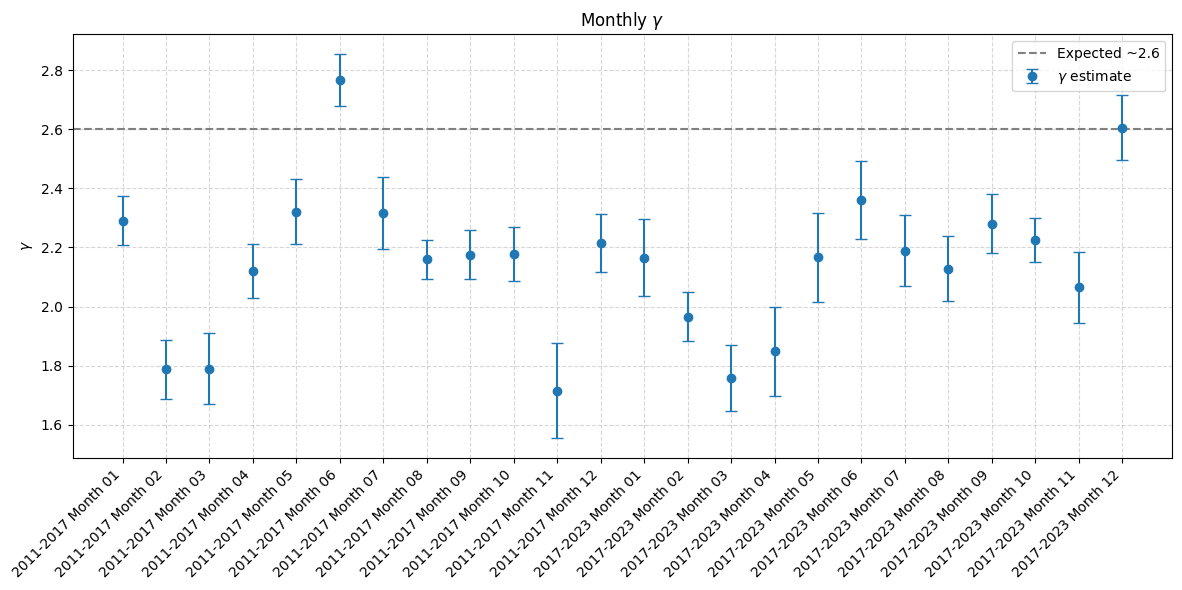

In [27]:
labels = []
gammas = []
gamma_errors = []

for label, amp, amp_err in data:
    gamma = amp / v_over_c - 2
    gamma_err = amp_err / v_over_c
    labels.append(label)
    gammas.append(gamma)
    gamma_errors.append(gamma_err)
x = np.arange(len(labels))

plt.figure(figsize=(12, 6))
plt.errorbar(x, gammas, yerr=gamma_errors, fmt='o', capsize=4, label=r'$\gamma$ estimate')
plt.axhline(2.6, color='gray', linestyle='--', label='Expected ~2.6')
plt.xticks(x, labels, rotation=45, ha='right')
plt.ylabel(r'$\gamma$')
plt.title(r'Monthly $\gamma$')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.legend()
plt.show()